In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from joblib import Parallel, delayed

In [27]:
# Constants
A = 0.25
pi = np.pi
m = 1  # You can adjust m as needed

In [28]:
# Define F, alpha, and beta (vectorized versions)
def F(k):
    return (A / (2 * np.sqrt(pi))) * np.exp(-k**2 / 4)

def alpha(k):
    return np.sqrt(k**2 + m**2)

def beta(k, F_k):
    return F_k * (k - m)

In [29]:
# Define the integrand for v(x,t)
def integrand_v(k, x, t):
    F_k = F(k)
    alpha_k = alpha(k)
    beta_k = beta(k, F_k)
    term1 = ((F_k * alpha_k - beta_k) / (2 * alpha_k)) * np.exp(-1j * alpha_k * t) * (-(k + alpha_k) / m)
    term2 = ((F_k * alpha_k + beta_k) / (2 * alpha_k)) * np.exp(1j * alpha_k * t) * (-(k - alpha_k) / m)
    return (term1 + term2) * np.exp(-1j * k * x)

In [30]:
# Define the integrand for u(x,t)
def integrand_u(k, x, t):
    F_k = F(k)
    alpha_k = alpha(k)
    beta_k = beta(k, F_k)
    term1 = ((F_k * alpha_k - beta_k) / (2 * alpha_k)) * np.exp(-1j * alpha_k * t)
    term2 = ((F_k * alpha_k + beta_k) / (2 * alpha_k)) * np.exp(1j * alpha_k * t)
    return (term1 + term2) * np.exp(-1j * k * x)

In [31]:
# Numerical integration for v(x, t) and u(x, t)
def compute_integral(integrand, x, t):
    real_part = quad(lambda k: np.real(integrand(k, x, t)), -np.inf, np.inf, limit=100)[0]
    imag_part = quad(lambda k: np.imag(integrand(k, x, t)), -np.inf, np.inf, limit=100)[0]
    return real_part + 1j * imag_part

In [32]:
# Parallel computation of v(x, t) and u(x, t)
def compute_v_parallel(x_values, t_values):
    return Parallel(n_jobs=-1)(delayed(compute_integral)(integrand_v, x, t) for t in t_values for x in x_values)

def compute_u_parallel(x_values, t_values):
    return Parallel(n_jobs=-1)(delayed(compute_integral)(integrand_u, x, t) for t in t_values for x in x_values)

In [49]:
# Generate x and t values
x_values = np.linspace(-10, 10, 200)
t_values = np.arange(0, 5 + 1, 1)

# Compute v(x, t) and u(x, t) in parallel
v_values_flat = compute_v_parallel(x_values, t_values)
u_values_flat = compute_u_parallel(x_values, t_values)

# Reshape the flat lists into 2D arrays
v_values = np.array(v_values_flat).reshape(len(t_values), len(x_values))
u_values = np.array(u_values_flat).reshape(len(t_values), len(x_values))

# Create meshgrid for x and t values
x_values, t_values = np.meshgrid(x_values, t_values)

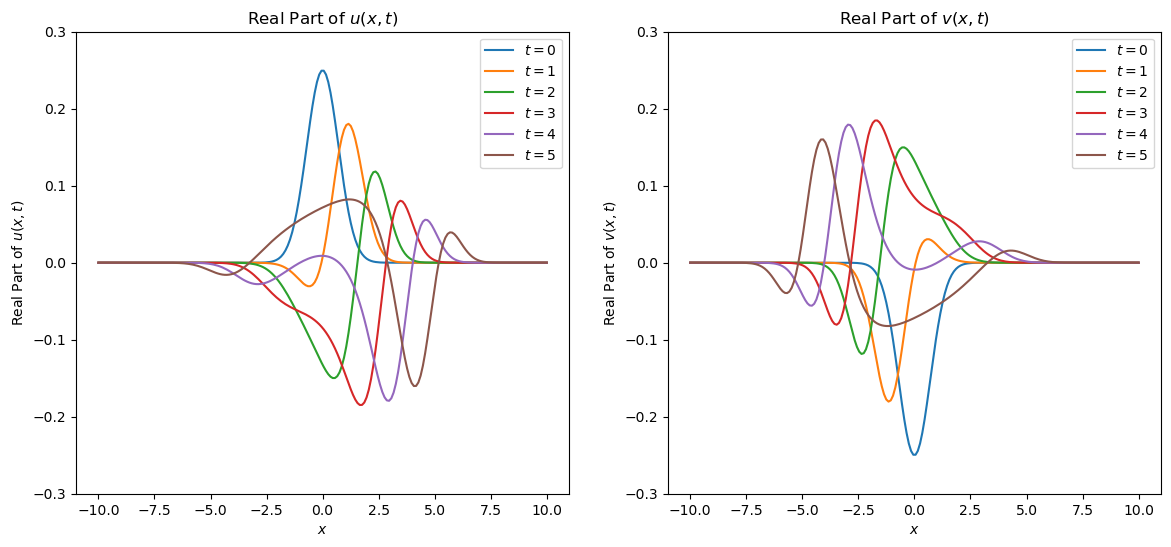

In [51]:
# Import additional library
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Real Part of u(x,t)
for i, t in enumerate(np.unique(t_values)):
    ax1.plot(x_values[i], u_values[i].real, label=f'$t={t}$')
    
ax1.set_title('Real Part of $u(x,t)$')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'Real Part of $u(x,t)$')
ax1.set_ylim(-A/5-A, +A/5+A)
ax1.legend()

# Plot the Real Part of v(x,t)
for i, t in enumerate(np.unique(t_values)):
    ax2.plot(x_values[i], v_values[i].real, label=f'$t={t}$')
    
ax2.set_title('Real Part of $v(x,t)$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'Real Part of $v(x,t)$')
ax2.set_ylim(-A/5-A, +A/5+A)
ax2.legend()

plt.show()